<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Chapter 2

* MCAR - missing completely at random. There is no relationship between a columns missingness and observation or missingness in other columns. i.e. isnull().corr() shows near zero correlation scores.
* MAR - missing at random: the data looks missing completely at random, but there might be an explanation that isn't measure which makes is not random. e.g. missing students, but you can't see they all sat close to each other.
* MNAR - missing, not a random. There are correlations between the missingness and the other data - be that values of missingness.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = 'diabetes.csv'
diabetes = pd.read_csv('diabetes.csv')
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnant             768 non-null float64
Glucose              763 non-null float64
Diastolic_BP         733 non-null float64
Skin_Fold            541 non-null float64
Serum_Insulin        394 non-null float64
BMI                  757 non-null float64
Diabetes_Pedigree    768 non-null float64
Age                  768 non-null int64
Class                768 non-null float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


'/usr/local/share/datasets/matrix_diabetes.png'

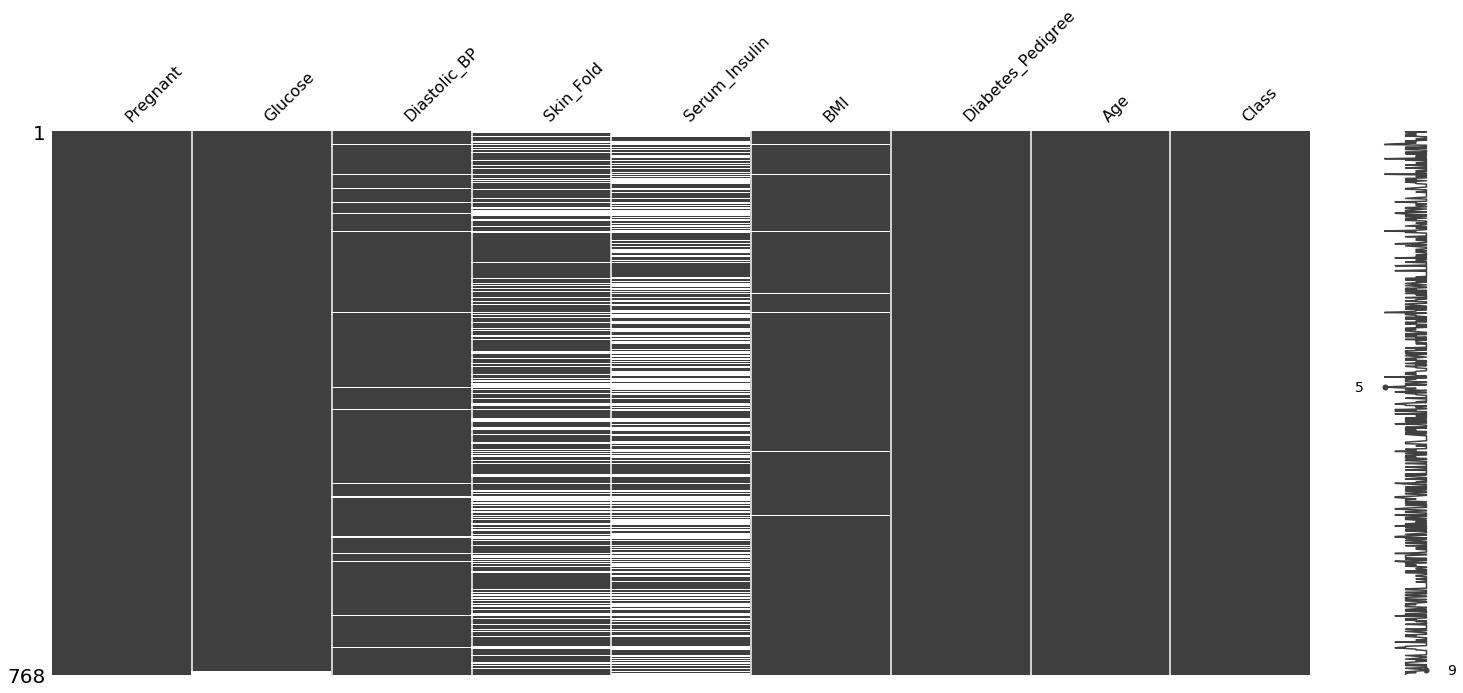

In [13]:
# Import missingno as msno
import missingno as msno

# Visualize the missingness summary
msno.matrix(diabetes.sort_values('Glucose'))

# Display nullity matrix
display("/usr/local/share/datasets/matrix_diabetes.png")

'/usr/local/share/datasets/matrix_sorted.png'

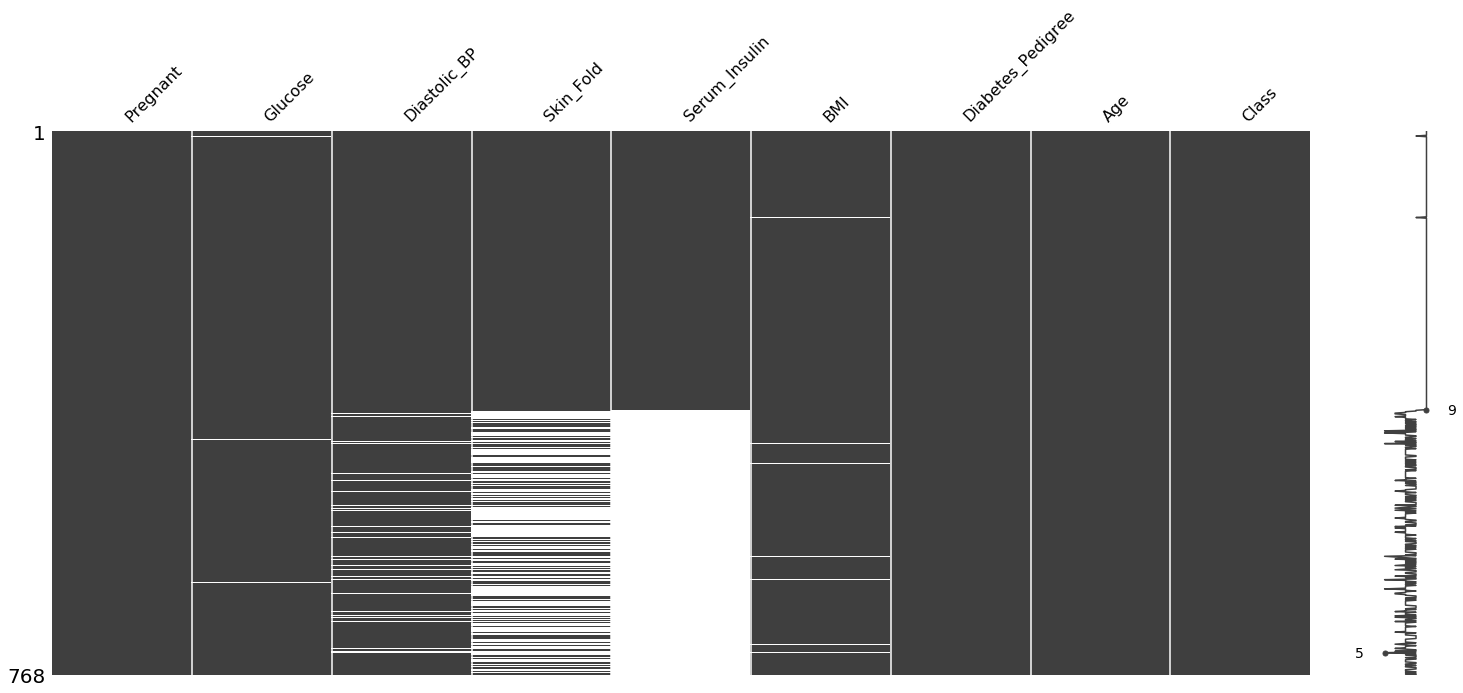

In [15]:
# Import missingno as msno
import missingno as msno

# Sort diabetes dataframe on 'Serum Insulin'
sorted_values = diabetes.sort_values('Serum_Insulin')

# Visualize the missingness summary of sorted
msno.matrix(sorted_values)

# Display nullity matrix
display("/usr/local/share/datasets/matrix_sorted.png")

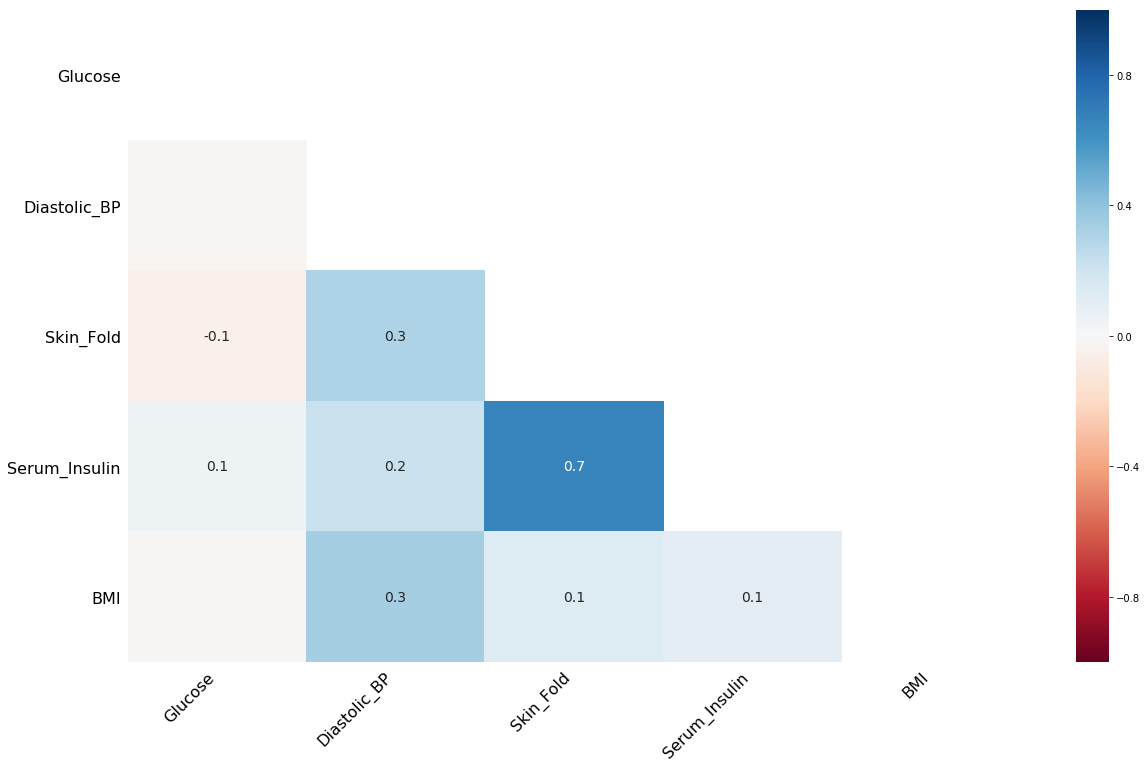

In [16]:
# Import missingno
import missingno as msno

# Plot missingness heatmap of diabetes
msno.heatmap(diabetes)

# Show plot
plt.show()

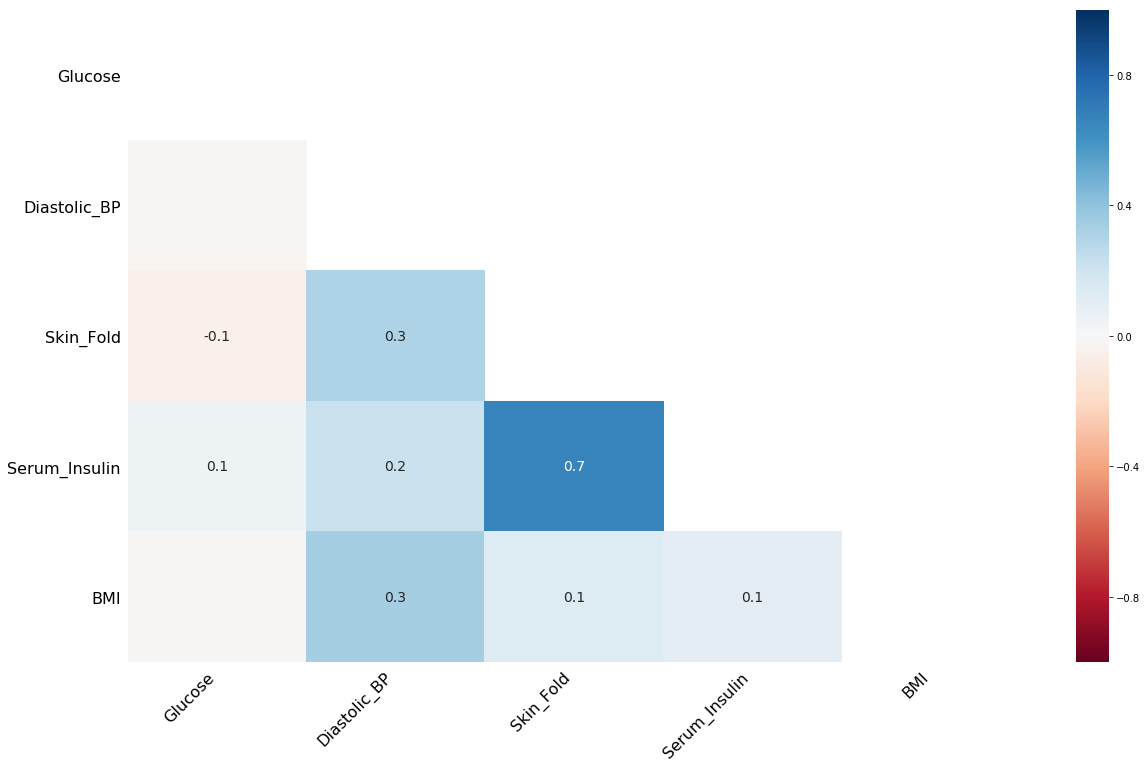

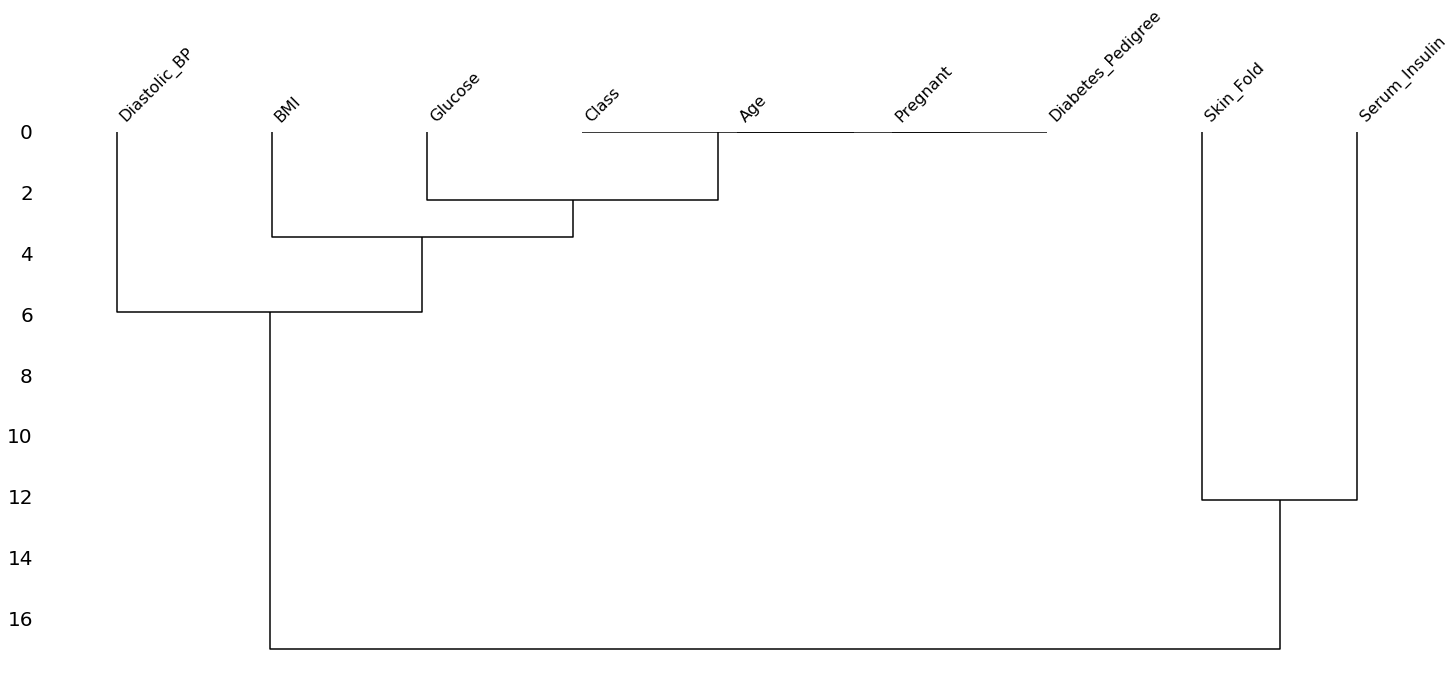

In [17]:
# Import missingno
import missingno as msno

# Plot missingness heatmap of diabetes
msno.heatmap(diabetes)

# Plot missingness dendrogram of diabetes
msno.dendrogram(diabetes)

# Show plot
plt.show()

In [ ]:
def fill_dummy_values(df):
  df_dummy = df.copy(deep=True)
  for col_name in df_dummy:
    col = df_dummy[col_name]
    col_null = col.isnull()    
    # Calculate number of missing values in column 
    num_nulls = col_null.sum()
  return df_dummy

In [18]:
def fill_dummy_values(df):
  df_dummy = df.copy(deep=True)
  for col_name in df_dummy:
    col = df_dummy[col_name]
    col_null = col.isnull()    
    # Calculate number of missing values in column 
    num_nulls = col_null.sum()
    # Calculate column range
    col_range = col.max() - col.min()
  return df_dummy

In [19]:
from numpy.random import rand

In [36]:
def fill_dummy_values(df):
  df_dummy = df.copy(deep=True)
  for col_name in df_dummy:
    col = df_dummy[col_name]
    col_null = col.isnull()    
    # Calculate number of missing values in column 
    num_nulls = col_null.sum()
    # Calculate column range
    col_range = col.max() - col.min()
    # Calculate random values of size num_nulls
    dummy_values = (rand(num_nulls) - 2)
  return df_dummy

In [37]:
def fill_dummy_values(df, scaling_factor=0.075):
  df_dummy = df.copy(deep=True)
  for col_name in df_dummy:
    col = df_dummy[col_name]
    col_null = col.isnull()    
    # Calculate number of missing values in column 
    num_nulls = col_null.sum()
    # Calculate column range
    col_range = col.max() - col.min()
    # Scale the random values to scaling_factor times col_range
    dummy_values = (rand(num_nulls) - 2) * scaling_factor * col_range + col.min()
    col[col_null] = dummy_values
  return df_dummy

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


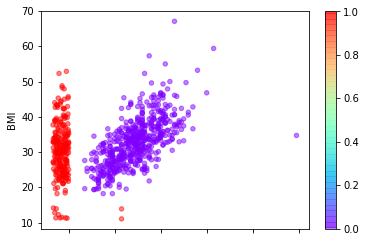

In [42]:
# Fill dummy values in diabetes_dummy
diabetes_dummy = fill_dummy_values(diabetes)

# Sum the nullity of Skin_Fold and BMI
nullity = (diabetes['Skin_Fold'].isnull() + diabetes['BMI'].isnull())

# Create a scatter plot of Skin Fold and BMI 
diabetes_dummy.plot(x='Skin_Fold', y='BMI', kind='scatter', alpha=0.5, 
                    
                    # Set color to nullity of BMI and Skin_Fold
                    # the colour shows which values are dummy replacements
                    # of NaN's
                    c=nullity, 
                    cmap='rainbow')

plt.show()

'/usr/local/share/datasets/matrix_diabetes.png'

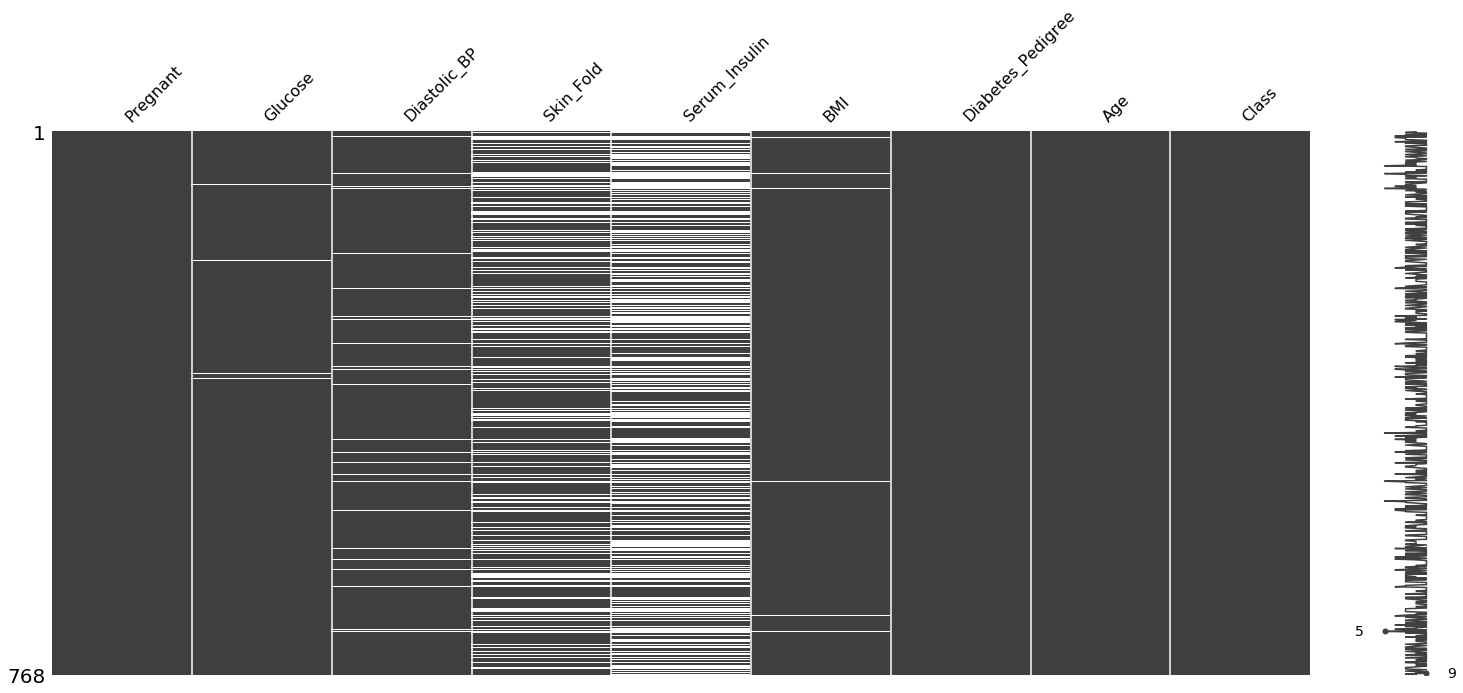

In [44]:
# Visualize the missingness of diabetes prior to dropping missing values
msno.matrix(diabetes)

# Display nullity matrix
display("/usr/local/share/datasets/matrix_diabetes.png")

5


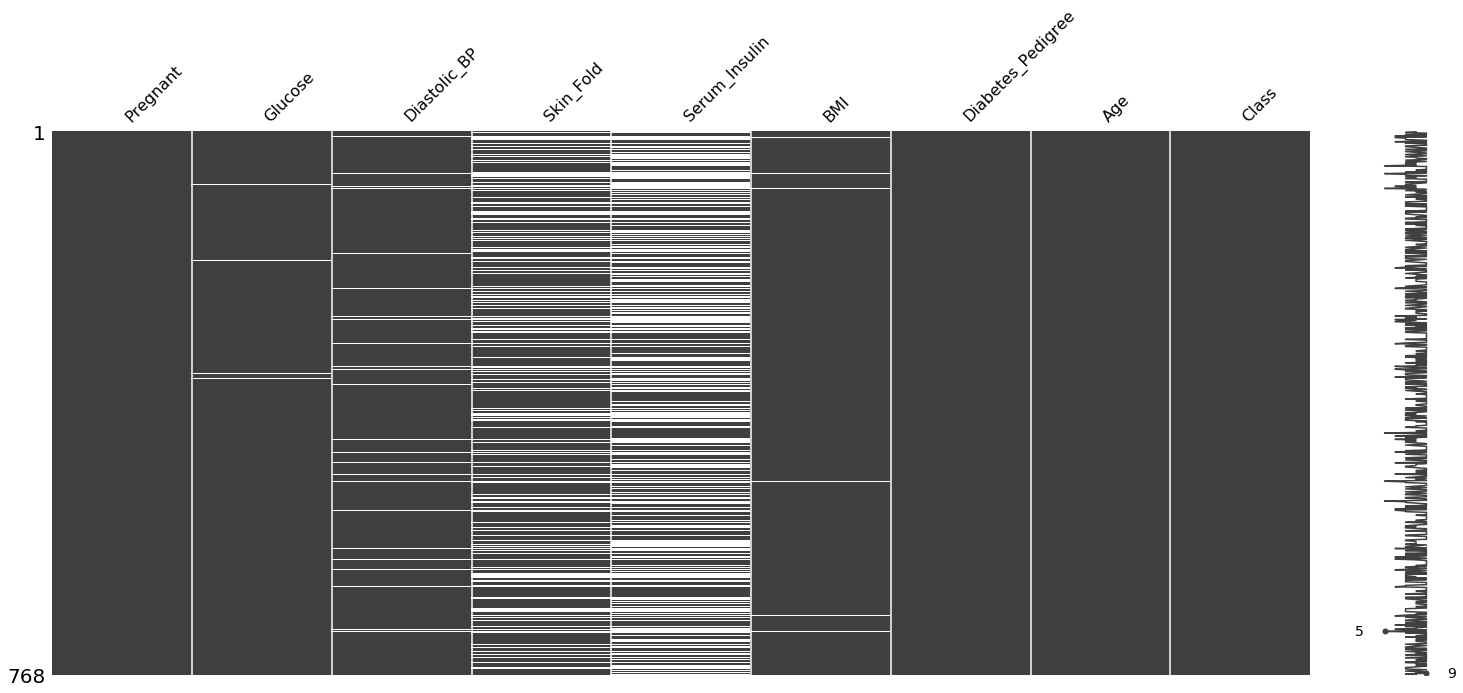

In [45]:
# Visualize the missingness of diabetes prior to dropping missing values
msno.matrix(diabetes)

# Print the number of missing values in Glucose
print(diabetes['Glucose'].isnull().sum())

5


'/usr/local/share/datasets/glucose_dropped.png'

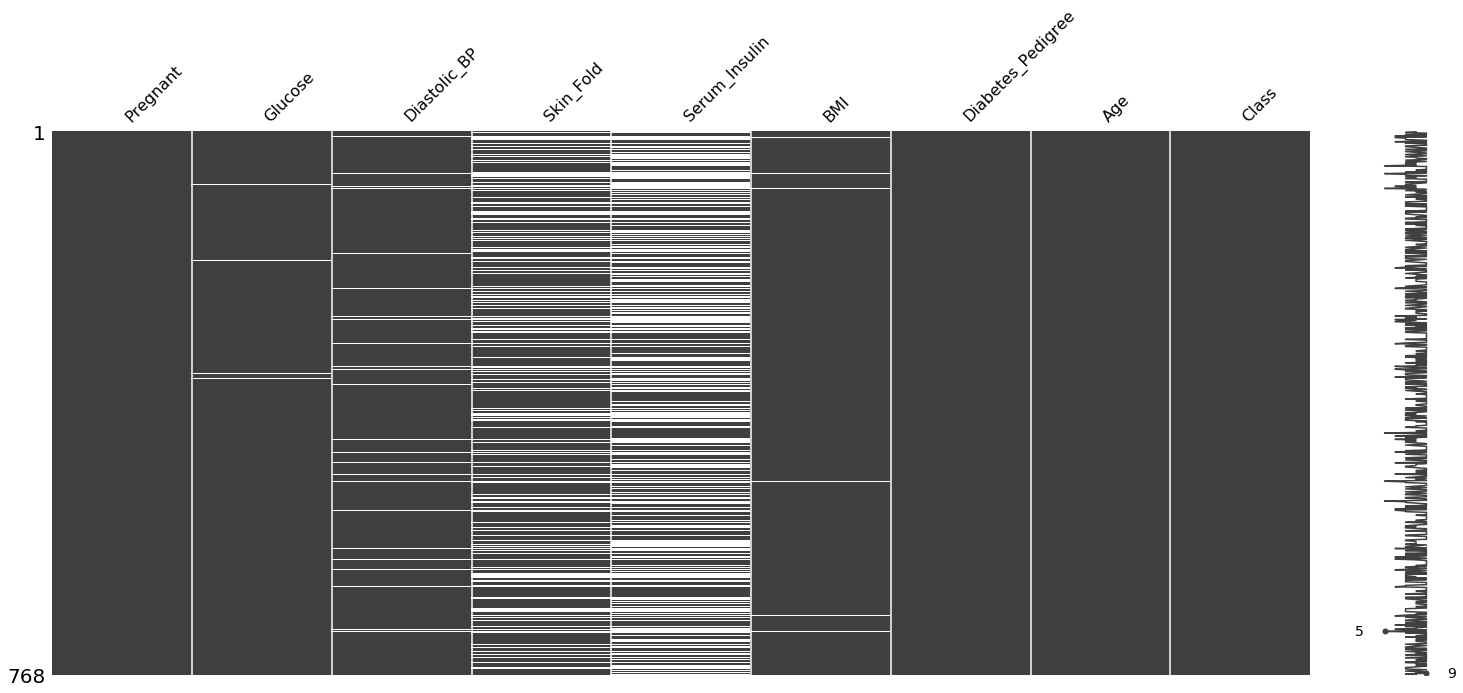

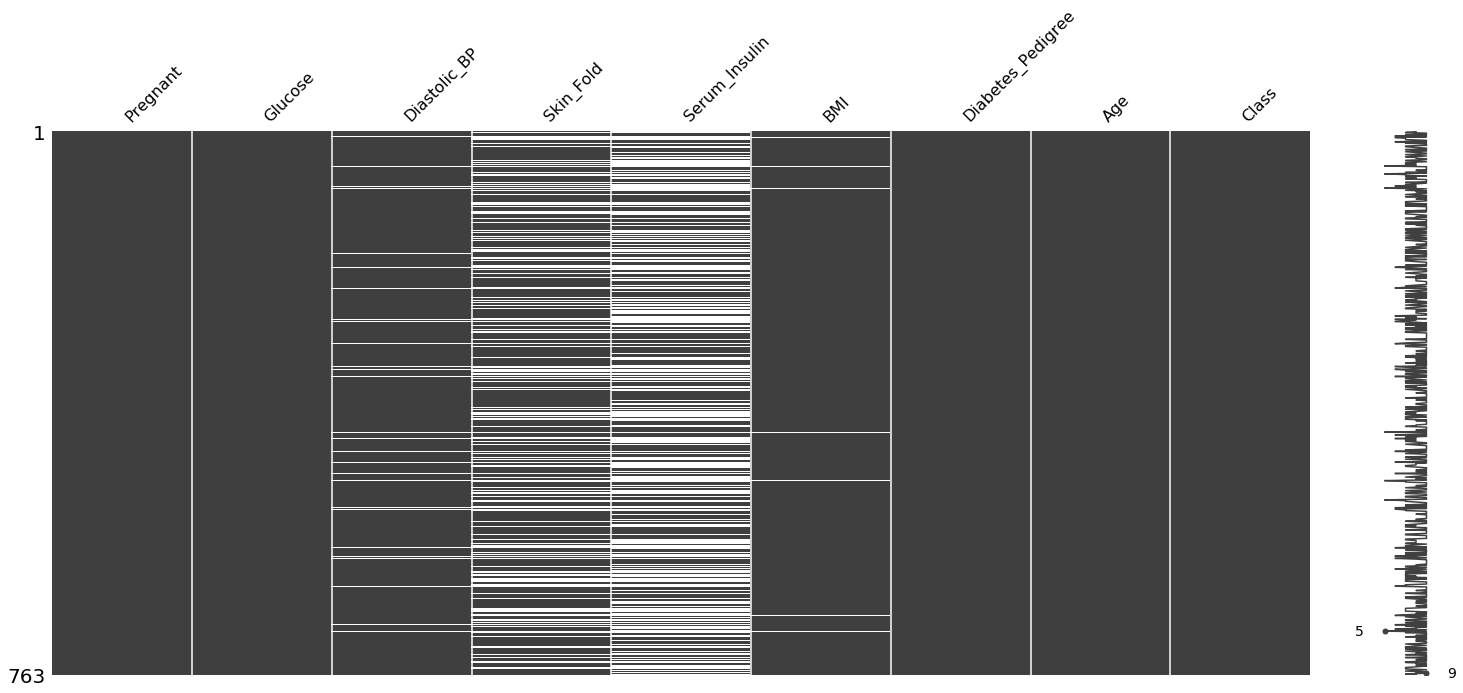

In [46]:
# Visualize the missingness of diabetes prior to dropping missing values
msno.matrix(diabetes)

# Print the number of missing values in Glucose
print(diabetes['Glucose'].isnull().sum())

# Drop rows where 'Glucose' has a missing value
diabetes.dropna(subset=['Glucose'], how='any', inplace=True)

# Visualize the missingness of diabetes after dropping missing values
msno.matrix(diabetes)

display("/usr/local/share/datasets/glucose_dropped.png")

'/usr/local/share/datasets/matrix_diabetes.png'

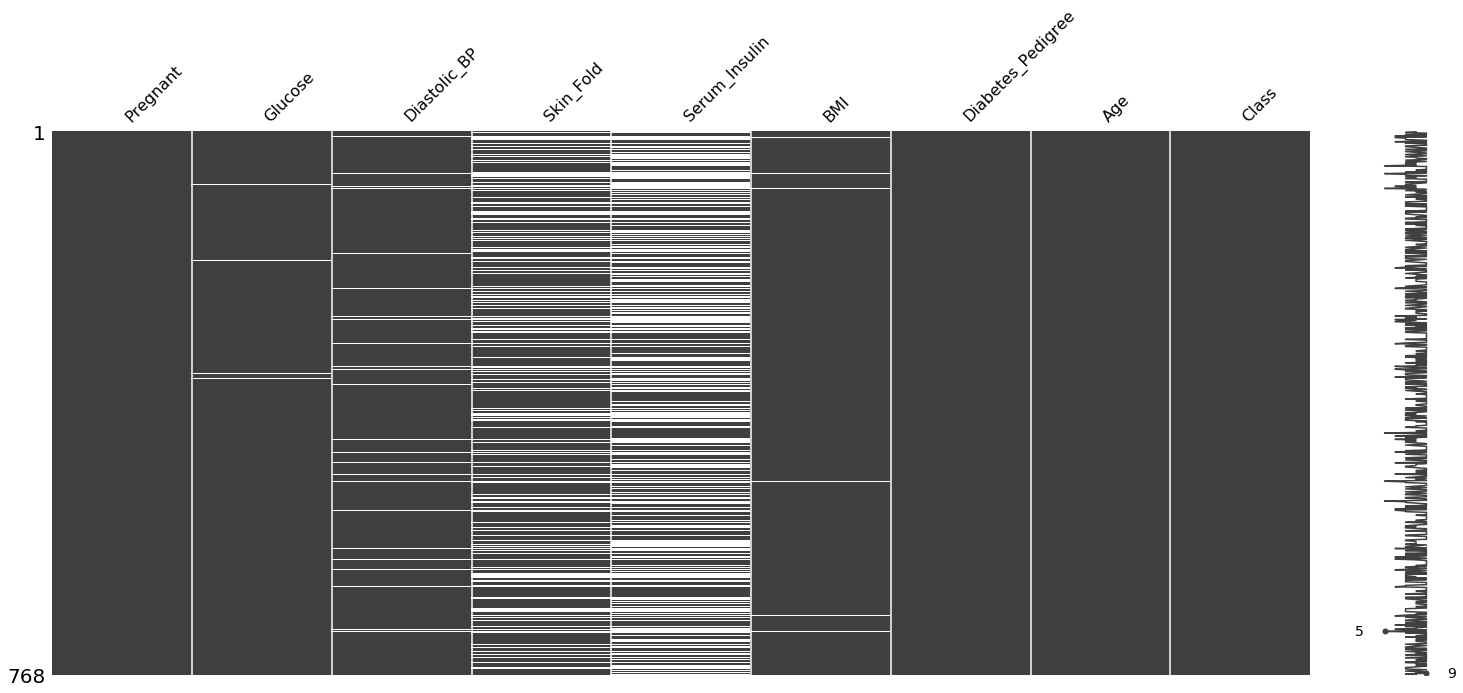

In [51]:
# Visualize the missingness in the data
msno.matrix(diabetes)

# Display nullity matrix
display("/usr/local/share/datasets/matrix_diabetes.png")

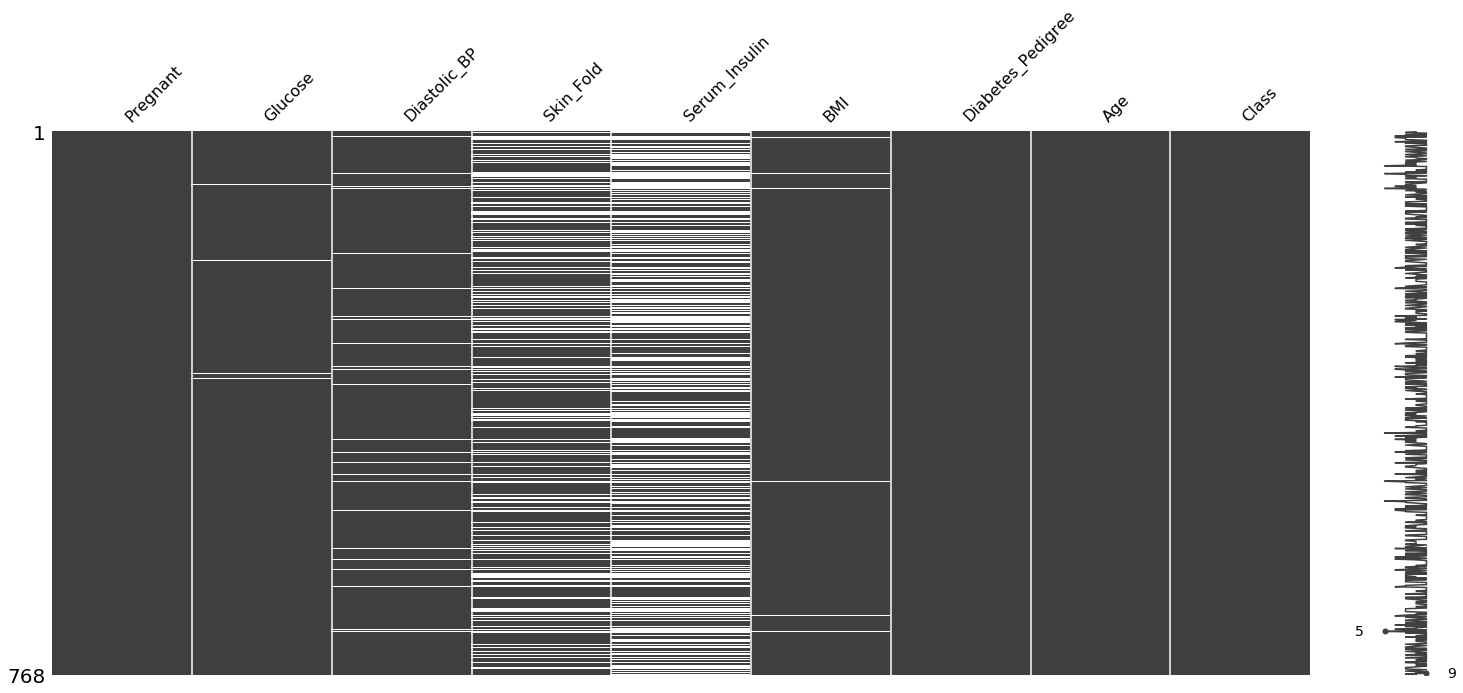

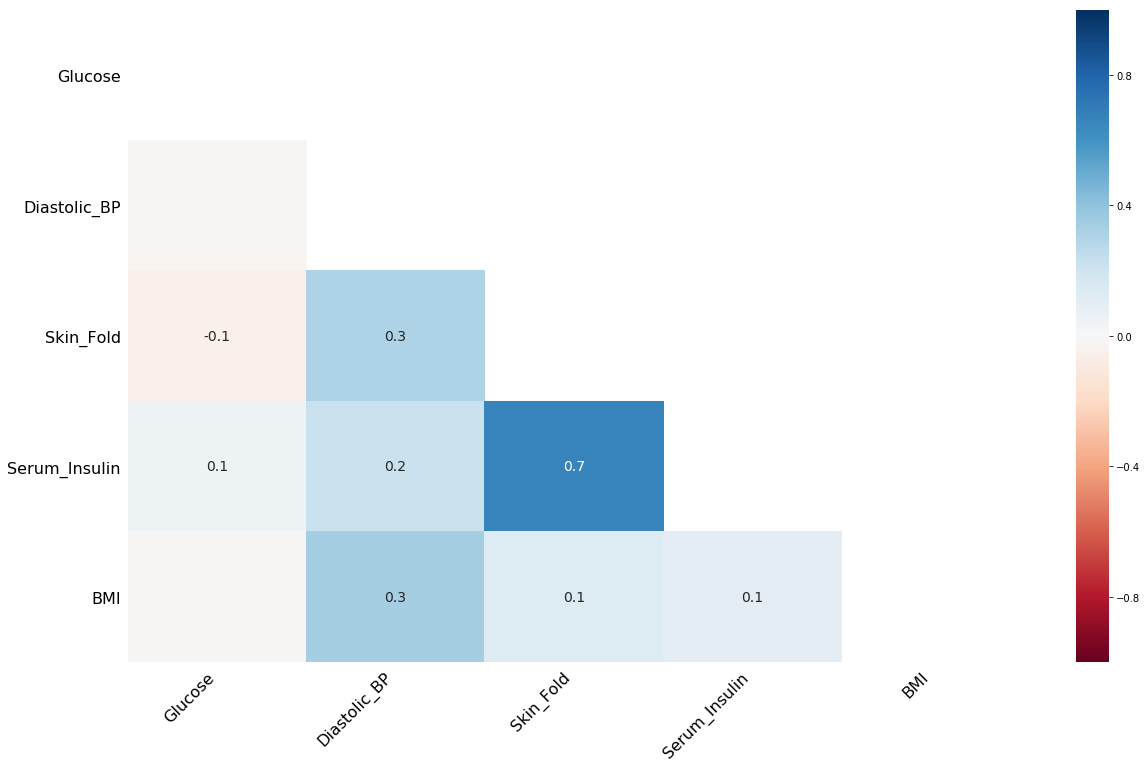

In [52]:
# Visualize the missingness in the data
msno.matrix(diabetes)

# Visualize the correlation of missingness between variables
msno.heatmap(diabetes)

# Show heatmap
plt.show()

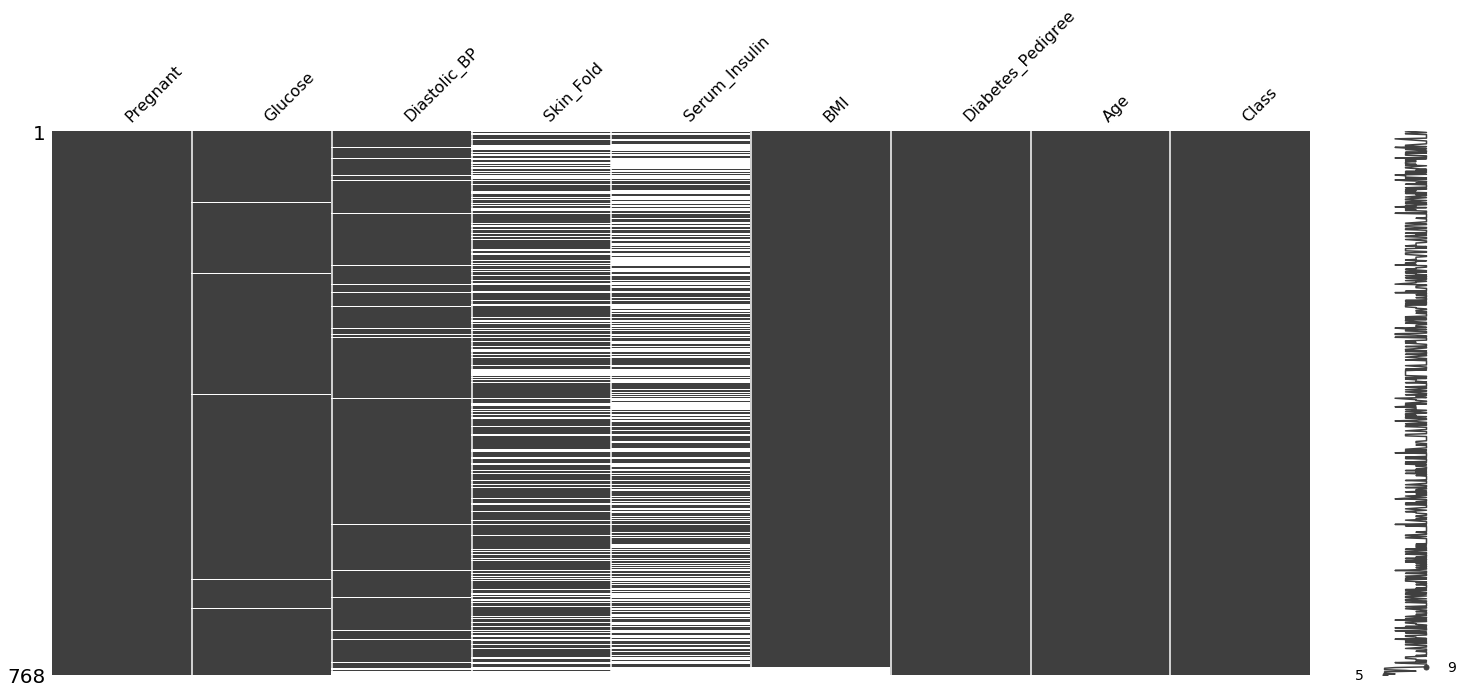

In [53]:
msno.matrix(diabetes.sort_values(by='BMI'))

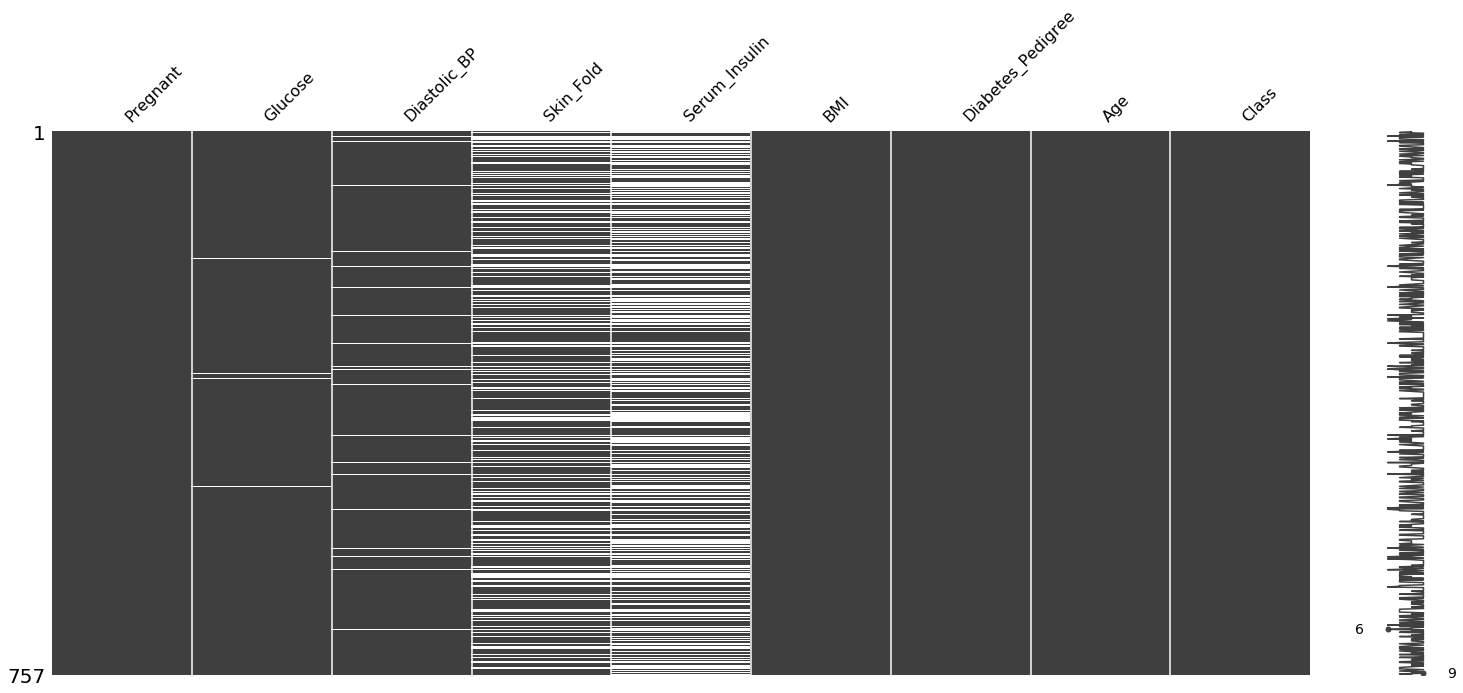

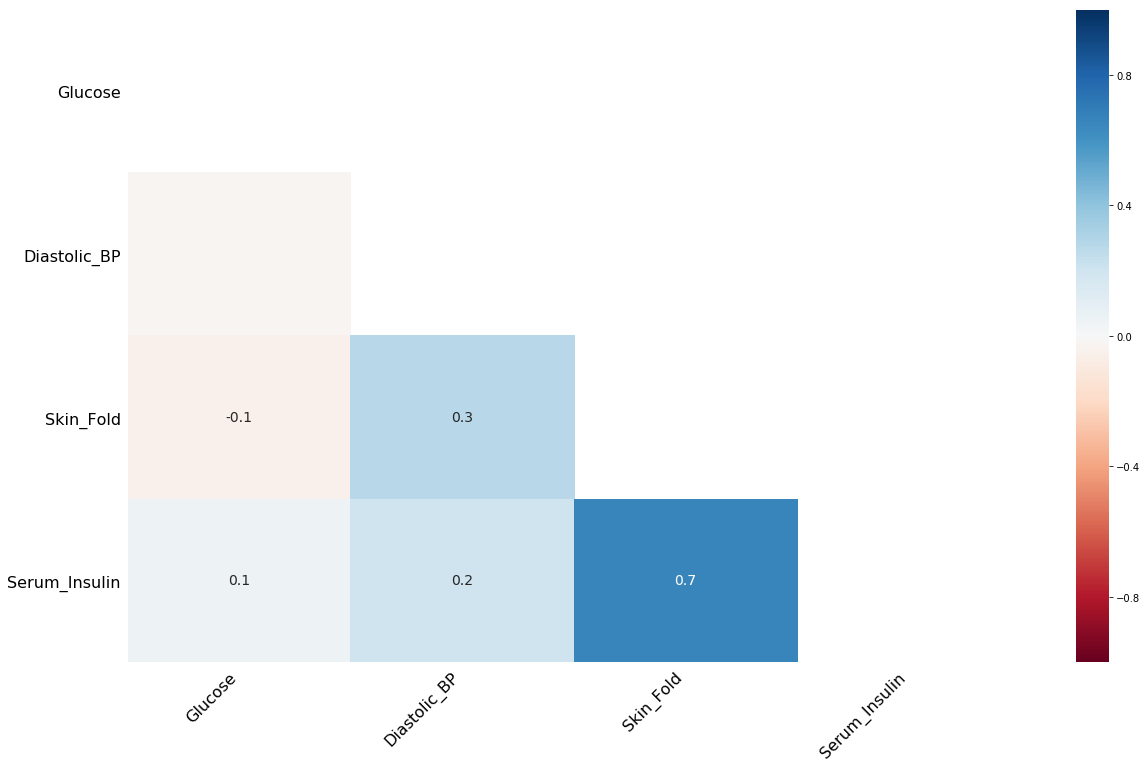

In [55]:
# Visualize the missingness in the data
msno.matrix(diabetes)

# Visualize the correlation of missingness between variables
msno.heatmap(diabetes)

# Show heatmap
plt.show()

# Drop rows where 'BMI' has a missing value
diabetes.dropna(subset=['BMI'], how='all', inplace=True)